In [1]:
import time
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
import networkx as nx
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams["axes.grid"] = False

In [2]:
def build_undirected_graph(edges):
    """Build adjacency list for undirected graph."""
    g = defaultdict(set)
    for u, v in edges:
        g[u].add(v)
        g[v].add(u)
    return g

def suggest_friends_bfs(graph, user, max_suggestions=10):
    """
    Suggest friends for `user` by counting friends-of-friends (mutual friends count).
    Returns list of (candidate, mutual_count) sorted by mutual_count desc.
    """
    if user not in graph:
        return []
    direct = graph[user]
    candidates = Counter()
    for friend in direct:
        for fof in graph[friend]:
            if fof != user and fof not in direct:
                candidates[fof] += 1
    return candidates.most_common(max_suggestions)

In [3]:
edges1 = [
    ("A","B"), ("A","C"), ("B","D"), ("B","E"),
    ("C","F"), ("E","F"), ("D","G"), ("F","H"),
    ("H","I"), ("G","I"), ("J","K")
]

g1 = build_undirected_graph(edges1)
print("Graph adjacency (sample):")
for node in sorted(g1):
    print(node, "->", sorted(list(g1[node])))
print()
print("Suggestions for A:", suggest_friends_bfs(g1, "A"))
print("Suggestions for B:", suggest_friends_bfs(g1, "B"))

Graph adjacency (sample):
A -> ['B', 'C']
B -> ['A', 'D', 'E']
C -> ['A', 'F']
D -> ['B', 'G']
E -> ['B', 'F']
F -> ['C', 'E', 'H']
G -> ['D', 'I']
H -> ['F', 'I']
I -> ['G', 'H']
J -> ['K']
K -> ['J']

Suggestions for A: [('E', 1), ('D', 1), ('F', 1)]
Suggestions for B: [('F', 1), ('C', 1), ('G', 1)]


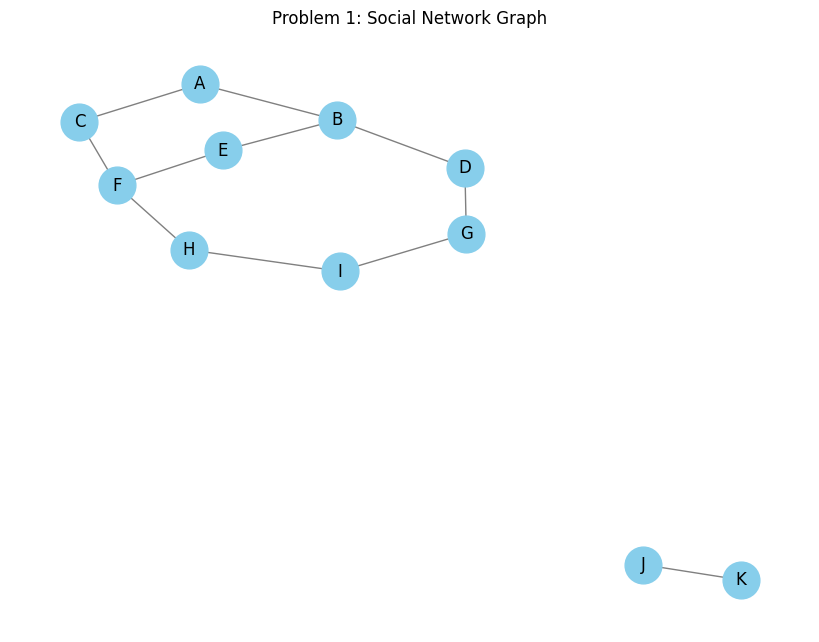

In [4]:
G1 = nx.Graph()
G1.add_edges_from(edges1)
pos = nx.spring_layout(G1, seed=42)
plt.figure()
nx.draw(G1, pos, with_labels=True, node_color='skyblue', node_size=700, edge_color='gray')
plt.title('Problem 1: Social Network Graph')
plt.show()

In [5]:
print("\nTime Complexity:")
print("- Building adjacency list: O(V + E)")
print("- Suggesting (counting mutual friends): O(sum deg(f)) <= O(E)")
print("- Overall: O(V + E), Space O(V + E)")


Time Complexity:
- Building adjacency list: O(V + E)
- Suggesting (counting mutual friends): O(sum deg(f)) <= O(E)
- Overall: O(V + E), Space O(V + E)
